In [1]:
from config import Config
from dotenv import load_dotenv

load_dotenv()
from fhirsdk.client import Client, Auth, AuthCredentials 
from fhirsdk import Patient, PlanDefinition, Reference, CarePlan, Encounter, ServiceRequest, CodeableConcept, Coding, ResearchStudy, ResearchSubject

# load the credentials/endpoint from environment variables
cfg = Config.from_env()
# Initialize FHIR client
client = Client(cfg.endpoint_url, auth=Auth(method="basic", credentials=AuthCredentials(username=cfg.fhir_username, password=cfg.fhir_password)))

In [ ]:
# Get a ResearchStudy by name
study = client.read(ResearchStudy, "Dynamic-Schedule-Exit-Example")

In [ ]:
study.protocol

In [ ]:
def check_study(study_id: str) -> ResearchStudy:
    study = client.read(ResearchStudy, study_id)
    for protocol in study.protocol:
        _study_plan = client.read(PlanDefinition, protocol.reference.split("/")[-1])
        for action in _study_plan.action:
            if action.definition_canonical:
                _pd_id = action.definition_canonical.split("/")[-1]
                try:
                    plan_def = client.read(PlanDefinition, _pd_id)
                except Exception as e:
                    print(_pd_id)

In [ ]:
check_study("Dynamic-Schedule-Cycles-Example")

In [2]:
from common import build_transition_graph, print_transition_graph, render_transition_graph

plan = client.read(PlanDefinition, "dynamic-visit-schedules-cycles-scheduled-interactions")

graph = build_transition_graph(plan)

In [3]:
print_transition_graph(graph)

=== Transition Graph ===

Starting Actions (no incoming references):
  - 3f8af28a-6333-45d6-ad9b-2a11982061cd: IS

Transitions (in logical order):
  3f8af28a-6333-45d6-ad9b-2a11982061cd (IS) (PlanDefinition/dynamic-visit-schedules-cycles-scheduled-interactions-IS):
    -> bb3a9124-dc58-460d-bc98-3473e022b3a7 (PlanDefinition/dynamic-visit-schedules-cycles-scheduled-interactions-Screen) (Screen)
  bb3a9124-dc58-460d-bc98-3473e022b3a7 (Screen) (PlanDefinition/dynamic-visit-schedules-cycles-scheduled-interactions-Screen):
    -> 0e8beeb2-35e4-4d40-b51b-8b8b8c568e5f (PlanDefinition/dynamic-visit-schedules-cycles-scheduled-interactions-Rand) (Rand) [condition-kind: start] {'informedConsentSigned': True, 'operation': '=='}
    -> d44db18e-f0cf-4126-9485-fbcf24046c28 (PlanDefinition/dynamic-visit-schedules-cycles-scheduled-interactions-IF) (IF) [condition-kind: start] {'informedConsentSigned': False, 'operation': '=='}
  0e8beeb2-35e4-4d40-b51b-8b8b8c568e5f (Rand) (PlanDefinition/dynamic-visit

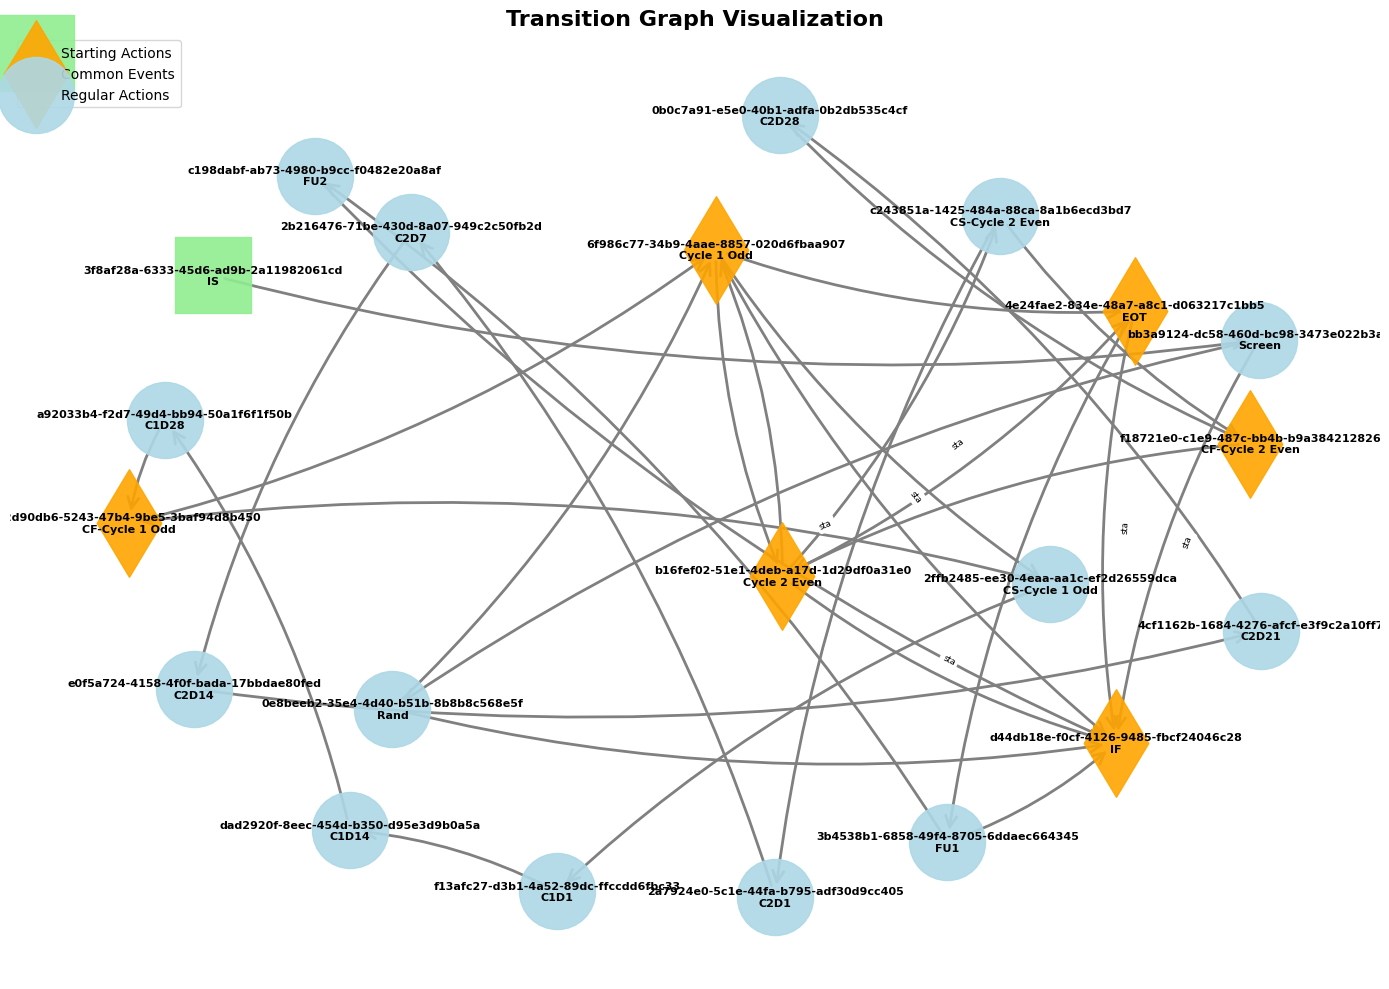

(<Figure size 1400x1000 with 1 Axes>,
 <Axes: title={'center': 'Transition Graph Visualization'}>)

In [3]:
render_transition_graph(graph)

In [ ]:
from enroll_patient import enrol_patient

In [ ]:
research_subject = enrol_patient(
    research_study_id="Dynamic-Schedule-Cycles-Example",
    patient_id="37335582-d020-4d24-b60c-af39b71a6128",
    config=cfg,
    subject_id="subject-004",
)

In [ ]:
research_subject.id

In [29]:
from evaluate import evaluate

planned = evaluate(
    research_subject_id="20d99eb2-5eaf-4798-8c2f-2eb5bea22d12", config=cfg)


=== Evaluation for Research Subject: 20d99eb2-5eaf-4798-8c2f-2eb5bea22d12 ===

Completed Events (22):
  ✓ 3f8af28a-6333-45d6-ad9b-2a11982061cd: IS (CarePlan: 53d538da-d9b3-4059-8b88-4b747512bab7)
     Date: 2026-01-13T20:37:51.073513Z
  ✓ bb3a9124-dc58-460d-bc98-3473e022b3a7: Screen (CarePlan: 5f08867e-3c25-4386-8d57-a5da34b62423)
     Date: 2026-01-13T20:38:11.305110Z
  ✓ 0e8beeb2-35e4-4d40-b51b-8b8b8c568e5f: Rand (CarePlan: 77cf41f0-dcd7-4887-b035-2e97acc682e3)
     Date: 2026-01-13T20:38:40.836649Z
  ✓ 6f986c77-34b9-4aae-8857-020d6fbaa907: Cycle 1 Odd (CarePlan: 89cdc090-3953-475f-97c2-e2d8dfcf7904)
     Date: 2026-01-13T20:54:10.457258Z
  ✓ 2ffb2485-ee30-4eaa-aa1c-ef2d26559dca: CS-Cycle 1 Odd (CarePlan: b1f74714-9b6f-4826-baff-7d4caeadb4b7)
     Date: 2026-01-13T20:54:56.892355Z
  ✓ f13afc27-d3b1-4a52-89dc-ffccdd6fbc33: C1D1 (CarePlan: 2f60ba97-c088-4c6f-8ed9-35ff0a80b2a8)
     Date: 2026-01-13T20:55:29.704648Z
  ✓ dad2920f-8eec-454d-b350-d95e3d9b0a5a: C1D14 (CarePlan: b8371906-a0

In [28]:
from execute import execute
import datetime

executed = execute("20d99eb2-5eaf-4798-8c2f-2eb5bea22d12", 
                   plan_definition_ids=["dynamic-visit-schedules-cycles-scheduled-interactions-C1D1"], 
                   visit_date=(datetime.datetime.now() + datetime.timedelta(days=8)), 
                   config=cfg)

In [ ]:
from execute import execute
import datetime

executed = execute("faf14ce8-1833-4a4e-b7c7-845ff7e49e09", 
                   plan_definition_ids=["dynamic-visit-schedule-exit-example-Screening-PlanDefinition"], 
                   visit_date=(datetime.datetime.now() + datetime.timedelta(days=7)), 
                   config=cfg)

In [ ]:
print(executed[0]['yaml'])



In [2]:
from report import report_patient_journey, visualize_patient_journey

patient_report = report_patient_journey("20d99eb2-5eaf-4798-8c2f-2eb5bea22d12", config=cfg)

visualize_patient_journey(patient_report)

RESEARCH SUBJECT REPORT

Research Subject ID: 20d99eb2-5eaf-4798-8c2f-2eb5bea22d12
Patient ID: 37335582-d020-4d24-b60c-af39b71a6128
Study: Dynamic Schedule Cycles Example
Protocol: dynamic-visit-schedules-cycles-scheduled-interactions (dynamic-visit-schedules-cycles-scheduled-interactions)

────────────────────────────────────────────────────────────────────────────────
SUMMARY
────────────────────────────────────────────────────────────────────────────────
Total Activities: 22
  Completed: 22
  Active: 0
Decisions Made: 6

────────────────────────────────────────────────────────────────────────────────
PATIENT JOURNEY
────────────────────────────────────────────────────────────────────────────────
1. ✓ IS
   Action ID: 3f8af28a-6333-45d6-ad9b-2a11982061cd
   PlanDefinition: dynamic-visit-schedules-cycles-scheduled-interactions-IS
   CarePlan: 53d538da-d9b3-4059-8b88-4b747512bab7
   Status: completed

2. ✓ Screen
   Action ID: bb3a9124-dc58-460d-bc98-3473e022b3a7
   PlanDefinition: dyn

TypeError: tuple indices must be integers or slices, not str

In [ ]:
# Import main package first to trigger model_rebuild() for all 866 models
import fhirsdk

from fhirsdk.hl7_fhir_r6_core.bundle import Bundle, BundleEntry
from fhirsdk.hl7_fhir_r6_core.resource import Resource
from fhirsdk.hl7_fhir_r6_core.domain_resource import DomainResource

In [ ]:
from fhirsdk import ResearchSubjectSubjectMilestone, CodeableConcept, Coding, CarePlan, Reference
import datetime

care_plan = CarePlan(
            status="revoked",
            intent="plan",
            based_on=[Reference(
                reference="RequestOrchestration/dbc6d453-4930-496d-9b48-f0b9acd73c02"
            )]  ,
            subject=Reference(reference="Patient/00126e97-9e44-4c16-9afa-13b7dc01d356"),
        )

CarePlan.model_validate(care_plan)